In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm

In [11]:
def load_data(file_path):
    df = pd.read_excel(file_path)
    return df[["Time (Minutes)", "Current (microAmperes)"]]

In [12]:
file_paths = {
    "AlGr0.5": "Stability Final_AlGr0.5.xlsx",
    "AlGr1": "Stability Final_AlGr1.xlsx",
    "Pure_Al": "Stability Final_Pure_Al.xlsx"
}

In [13]:
data = {name: load_data(path) for name, path in file_paths.items()}

In [14]:
combined_data = pd.concat(data.values())
X = combined_data[["Time (Minutes)"]]
y = combined_data["Current (microAmperes)"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
mc_predictions = []
n_simulations = 1000
for _ in range(n_simulations):
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    sample_y = y_train.iloc[sample_indices]
    mc_predictions.append(sample_y.mean())
mc_mean = np.mean(mc_predictions)
mc_std = np.std(mc_predictions)

In [17]:
future_times = np.linspace(X.min().values[0], X.max().values[0], 100).reshape(-1, 1)
nn_preds = nn_model.predict(future_times)
rf_preds = rf_model.predict(future_times)
mc_preds = norm.rvs(loc=mc_mean, scale=mc_std, size=100)

C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [24]:
predicted_data = {
    "AlGr1.25": pd.DataFrame({"Time (Minutes)": future_times.flatten(), "Predicted Current (microAmperes)": nn_preds}),
    "AlGr1.75": pd.DataFrame({"Time (Minutes)": future_times.flatten(), "Predicted Current (microAmperes)": rf_preds}),
    "AlGr2": pd.DataFrame({"Time (Minutes)": future_times.flatten(), "Predicted Current (microAmperes)": mc_preds})
}

In [27]:
for name, df in predicted_data.items():
    df.to_excel(f"Predicted_Current_Stability_{name}.xlsx", index=False)

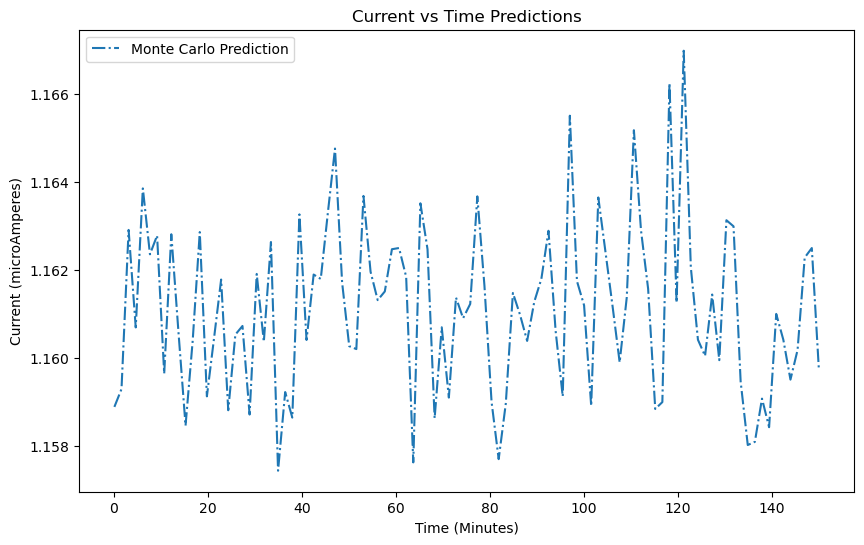

In [26]:
plt.figure(figsize=(10, 6))
#for name, df in data.items():
#    plt.scatter(df["Time (Minutes)"], df["Current (microAmperes)"], label=name, alpha=0.7)
#plt.plot(future_times, nn_preds, label='Neural Network Prediction', linestyle='dashed')
#plt.plot(future_times, rf_preds, label='Random Forest Prediction', linestyle='dotted')
plt.plot(future_times, mc_preds, label='Monte Carlo Prediction', linestyle='dashdot')
plt.xlabel("Time (Minutes)")
plt.ylabel("Current (microAmperes)")
plt.legend()
plt.title("Current vs Time Predictions")
plt.show()

In [136]:
file_algr1_25 = 'Predicted_Current_Stability_AlGr1.25.xlsx'
file_algr1_5 = 'Predicted_Current_Stability_AlGr1.5.xlsx'
file_algr1_75 = 'Predicted_Current_Stability_AlGr1.75.xlsx'
file_algr2 = 'Predicted_Current_Stability_AlGr2.xlsx'

In [137]:
data_algr1_25 = pd.read_excel(file_algr1_25)
data_algr1_5 = pd.read_excel(file_algr1_5)
data_algr1_75 = pd.read_excel(file_algr1_75)
data_algr2 = pd.read_excel(file_algr2)

In [138]:
features = ["Predicted Current (microAmperes)", "Time (Minutes)"]
algr1_25 = data_algr1_25[features]
algr1_5 = data_algr1_5[features]
algr1_75 = data_algr1_75[features]
algr2 = data_algr2[features]

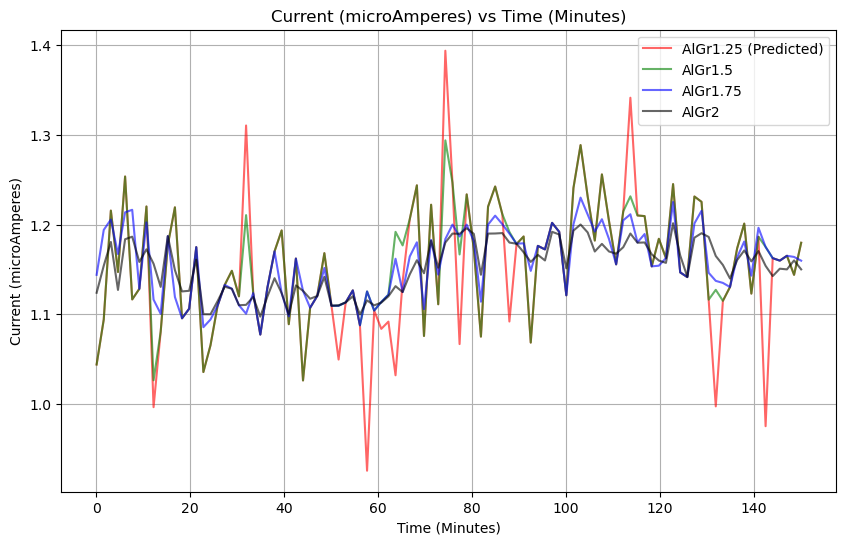

In [139]:
plt.figure(figsize=(10, 6))

plt.plot(algr1_25["Time (Minutes)"], algr1_25["Predicted Current (microAmperes)"], label="AlGr1.25 (Predicted)", alpha=0.6, color="red")
plt.plot(algr1_5["Time (Minutes)"], algr1_5["Predicted Current (microAmperes)"], label="AlGr1.5", alpha=0.6, color="green")
plt.plot(algr1_75["Time (Minutes)"], algr1_75["Predicted Current (microAmperes)"], label="AlGr1.75", alpha=0.6, color="blue")
plt.plot(algr2["Time (Minutes)"], algr2["Predicted Current (microAmperes)"], label="AlGr2", alpha=0.6, color="black")

plt.title("Current (microAmperes) vs Time (Minutes)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Current (microAmperes)")
plt.legend()
plt.grid()
plt.show()